# Nashove ravnoteže

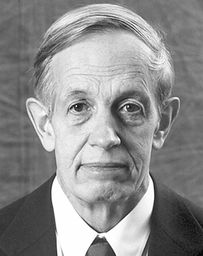

In [41]:
from IPython.display import Image
Image(filename='nash.jpg')

## 1. Uvod

U ovoj zadaći ćemo se upoznati s nekim osnovnim pojmovima iz teorije igara, s naglaskom na Nashove ravnoteže. Kroz primjere ćemo vidjeti što znači da je nešto Nashova ravnoteža te kako je tražimo u raznim igrama.

## 2. Bimatrične igre

**Bimatrična igra** je uređeni par
$G=(S_{A}×S_{B}, u×v)$
gdje su:
* $A$ i $B$ igrači te $S_{A}$ i $S_{B}$ skupovi mogućih akcija za igrača $A$, odnosno $B$
* $u, v : S_{A} × S_{B} \to\ {\rm I\!R}$ funkcije korisnosti igrača  

**Profil akcija** je svaki element skupa $S_{A}×S_{B}$  

**Nashova ravnoteža** (u nastavku NR) je profil akcija $(\sigma,\tau)$ takav da vrijedi:
* $u(\sigma,\tau) \geq u(\sigma, b), \forall b \in S_{B}$
* $v(\sigma,\tau) \geq v(a, \tau), \forall a \in S_{A}$

**Skup miješanih strategija** je skup $\Sigma_{A}=conv(S_{A})$ za igrača $A$, odnosno $\Sigma_{B}=conv(S_{B})$ za igrača $B$  

**Igra u normalnoj formi** je uređen par $(\Sigma, U)$, gdje je $\Sigma=\Sigma_{A}×\Sigma_{B}$ i $U=(u,v)$ uređeni par funkcija korisnosti $u$ i $v$

Uočimo da funkcije $u$ i $v$ te pojam Nashove ravnoteže možemo proširiti sa $S_{A}×S_{B}$ na $\Sigma_{A}×\Sigma_{B}$. $S_{A}$ i $S_{B}$ ne moraju biti konačni, ali u nastavku pretpostavljamo da jesu. Isto tako, igra može imati konačno ili beskonačno mnogo igrača, ali u nastavku radi jednostavnosti pretpostavljamo da ih ima konačno mnogo (najčešće dva).  
Također uočimo i da je za zadavanje igre dovoljno zadati matrice $U$ i $V$ isplata igrača $A$, odnosno $B$.

Prvo importamo što će nam trebati:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sympy import symbols, Matrix, Transpose, plot, Max
from sympy.solvers.solveset import linsolve

provjeri_unos je pomoćna funkcija, koja prima dvije matrice s kojima je zadana bimatrična igra i vraća 1 ako su iz istog vektorskog prostora, odnosno 0 ako nisu.

In [2]:
def provjeri_unos(U,V):
    numrows = len(U)
    numcols = len(U[0])
    testrows = len(V)
    testcols = len(V[0])
    return numrows != testrows or numcols != testcols

nacrtaj_bimatricu prima dvije matrice s kojima je zadana bimatrična igra te crta igru u normalnoj (tabličnoj) formi

In [3]:
def nacrtaj_bimatricu(U,V):
    
    if provjeri_unos(U,V) == True:
        print('Greška: U i V moraju biti iz istog prostora!')
        return
    
    numrows = len(U)
    numcols = len(U[0])
    
    matrix = [[(U[i][j], V[i][j]) for j in range(numcols)] for i in range(numrows)]
    
    df = pd.DataFrame(
        matrix, 
        columns=['B' + str(i+1) for i in range(numcols)], 
        index=['A' + str(i+1) for i in range(numrows)]
      )

    th_css = [
        ('font-size', '12px'),
        ('text-align', 'center'),
        ('font-weight', 'bold'),
        ('color', '#ffffff'),
        ('background-color', '#5f5f5f')
      ]

    td_css = [('font-size', '15px')]
    style = [
        dict(selector="th", props=th_css),
        dict(selector="td", props=td_css)
      ]
    display(df.style.set_table_styles(style))
    return np.array(matrix).reshape(numrows*numcols,2)

NR prima dvije matrice koje zadaju bimatričnu igru i ispisuje sve Nashove ravnoteže među čistim strategijama za tu igru.

In [4]:
# Nađi sve NR među čistim strategijama u igri zadanoj s U i V

def NR(U,V):
    
    if provjeri_unos(U,V) == True:
        print('Greška: U i V moraju biti iz istog prostora!')
        return
    
    numrows = len(U)
    numcols = len(U[0])
    
    bestr_a = []
    bestr_b = []
    cNR = []
    
    U = np.array(U)
    V = np.array(V)
    
    for i in range(numrows):
        for j in range(numcols):
            if V[i][j] == max(V[i]):
                bestr_a.append((i,j))
                
    U = U.transpose()
                
    for i in range(numcols):
        for j in range (numrows):
            if U[i][j] == max(U[i]):
                bestr_b.append((j,i))
                
    #print(bestr_a)
    #print(bestr_b)
    
    for item in bestr_b:
        if item in bestr_a:
            cNR.append(('A' + str(item[0]+1), 'B' + str(item[1]+1)))
    if cNR != []:
        print("Nashove ravnoteže su:", *cNR, sep=" ")
        
    else: 
        print("Nema NR među čistim strategijama.")

nacrtaj_graf prima $S_{A}×S_{B}$ i crta konveksnu ljusku tog skupa

In [5]:
def nacrtaj_graf(vrhovi):
    hull = ConvexHull(vrhovi)

    fig, ax = plt.subplots()

    for i in hull.simplices:
        plt.plot(
            vrhovi[i,0], 
            vrhovi[i,1], 
            color="green", 
            lw=2, 
            ls='-', 
            marker='o', 
            markersize=7, 
            markerfacecolor="red",
        )
    #plt.plot(vrhovi[1,1], markersize=10, markerfacecolor="blue")
        
    ax.grid(linestyle='dashed', linewidth=0.75)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('$\Sigma_{A}×\Sigma_{B}$')

    plt.show()

rijesi_minmax prima matricu s kojom je zadana matrična igra i modifikator, koji joj daje do znanja u kojem se dijelu algoritma nalazi, da bi ispravno pomnožila matrice. Vraća rješenje minmax zadaće.

In [6]:
def rijesi_minmax(U, mod):
    x, y = symbols('x y')
    X = Matrix([x, 1-x])
    Y = Matrix([y, 1-y])
    
    if(mod == 1):
        J = U * Y
    elif(mod == 2):
        J = Transpose(X) * U
    else:
        print("Neispravan modifier! Priznam samo 1 i 2.")
        return
    
    print(J)
    if len(J) > 2:
        kandidati = [list(linsolve([J[i]-J[(i+1)%len(J)]], y)) for i in range(len(J))]
    else:
        kandidati = [list(linsolve([J[0]-J[1]], x))]
    print(len(J))
    print(len(kandidati))
    temp = []
    for i in range(len(kandidati)):
        temp.append(J[i].subs(y, kandidati[i][0][0])) 
        
    maks = []
    rj = []
    
    if mod == 1:
        for i in range(len(kandidati)):
            if not J[i].subs(y, kandidati[i][0][0]) < J[(i+2)%len(J)].subs(y, kandidati[i][0][0]):
                maks.append(kandidati[i][0][0])
                rj.append(temp[i])
    elif mod == 2:
        for i in range(len(kandidati)):
            if not J[0].subs(x, kandidati[0][0][0]) > J[1].subs(x, kandidati[0][0][0]):
                maks.append(kandidati[i][0][0])
                rj.append(temp[i])
    if mod == 1:
        for i in range(len(maks)):
            if rj[i] == min(rj):
                return maks[i]
    elif mod == 2:
        for i in range(len(maks)):
            if rj[i] == max(rj):
                return maks[i]

Promotrimo nekoliko primjera.

In [7]:
U = [[8, 4], [2, 5]]
V = [[7, 0], [6, 4]]
tocke = nacrtaj_bimatricu(U,V)

,B1,B2
A1,"(8, 7)","(4, 0)"
A2,"(2, 6)","(5, 4)"


U gornjoj tablici prva koordinata svakog para predstavlja korisnost igrača $A$ za dani profil akcija, a druga korisnost igrača $B$. Odmah vidimo da ova igra ima jedinstvenu Nashovu ravnotežu: $($A1$, $B1$)$. Uvjerimo se da je zaista tako.

In [8]:
NR(U,V)

Nashove ravnoteže su: ('A1', 'B1')


Kako se to očituje na $\Sigma_{A}×\Sigma_{B}$? 

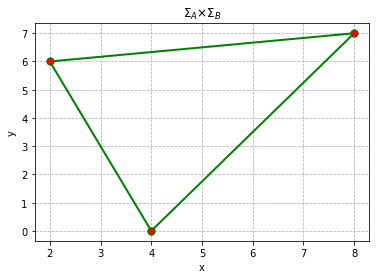

In [9]:
nacrtaj_graf(tocke)

Vidimo da je NR ove igre na samom vrhu ovog politopa.

Nashova ravnoteža ne mora uvijek davati najveće isplate igračima. Poznat primjer klase igara gdje se to ne događa su takozvane igre dilema zatvorenika. Pogledajmo kako izgleda tablica jedne takve igre.

In [10]:
U = [[3, -2], [6, 0]]
V = [[3, 6], [-2, 0]]
tocke = nacrtaj_bimatricu(U,V)
NR(U,V)

,B1,B2
A1,"(3, 3)","(-2, 6)"
A2,"(6, -2)","(0, 0)"


Nashove ravnoteže su: ('A2', 'B2')


Zašto je $($A2$, $B2$)$ NR? Pogledamo li opet definiciju NR, sasvim je jasno: svaki igrač samo gleda kako će sebi povećati korisnost, ne uzimajući u obzir kako će na to reagirati drugi igrač. Drugim riječima, NR ima svojstvo lokalne pohlepnosti.

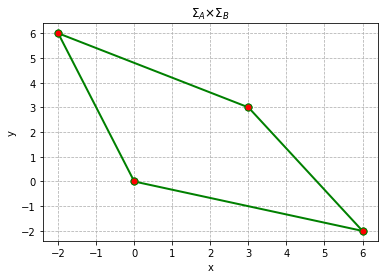

In [11]:
nacrtaj_graf(tocke)

Ovdje vidimo da, budući da NR ne daje igračima maksimalnu isplatu, nije u "gornjem desnom" vrhu politopa, kao u prethodnom primjeru.

Može se dogoditi i da igra ima više Nashovih ravnoteža, trivijalan primjer takve igre dan je u sljedećoj tablici, gdje je svaki profil akcija ujedno i NR.

In [12]:
U = [[4, 4], [4, 4]]
V = [[4, 4], [4, 4]]
tocke = nacrtaj_bimatricu(U,V)
NR(U,V)

,B1,B2
A1,"(4, 4)","(4, 4)"
A2,"(4, 4)","(4, 4)"


Nashove ravnoteže su: ('A1', 'B1') ('A2', 'B1') ('A1', 'B2') ('A2', 'B2')


Uočimo da ovdje nema smisla crtati skup $\Sigma_{A}×\Sigma_{B}$, jer sadrži samo jednu točku u ravnini.

Naravno, postoje i zanimljiviji primjeri.

In [13]:
U = [[5, 3], [1, 9]]
V = [[6, 4], [5, 9]]
tocke = nacrtaj_bimatricu(U,V)
NR(U,V)

,B1,B2
A1,"(5, 6)","(3, 4)"
A2,"(1, 5)","(9, 9)"


Nashove ravnoteže su: ('A1', 'B1') ('A2', 'B2')


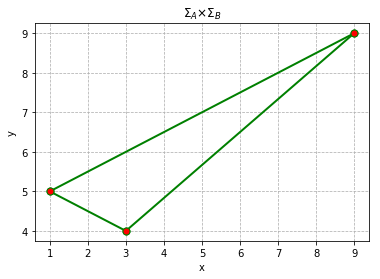

In [14]:
nacrtaj_graf(tocke)

Sada vidimo da Nashove ravnoteže ne moraju biti na rubu $\Sigma_{A}×\Sigma_{B}$, jer $(5,6) \in Int(\Sigma_{A}×\Sigma_{B})$.

Nameće se pitanje: mora li igra uvijek imati Nashovu ravnotežu? Promatramo li samo čiste strategije, ne. Dozvolimo li i miješane strategije, da. John Nash je to i dokazao sredinom 20. stoljeća.

Pogledajmo jedan primjer takve igre.

,B1,B2
A1,"(2, 4)","(1, 0)"
A2,"(3, 1)","(0, 4)"


Nema NR među čistim strategijama.


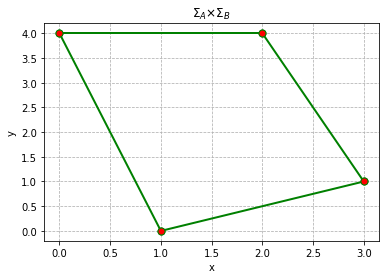

In [15]:
U = [[2, 1], [3, 0]]
V = [[4, 0], [1, 4]]
tocke = nacrtaj_bimatricu(U,V)
NR(U,V)
nacrtaj_graf(tocke)

Kako ova igra nema NR među čistim strategijama, niti jedna NR se ne nalazi na vrhu politopa $\Sigma_{A}×\Sigma_{B}$.

Malo zanimljiviji primjer igre koja nema NR među čistim strategijama je igra kamen-papir-škare. Neka su A1 i B1 kamen, A2 i B2 papir, i A3 i B3 škare. Također, neka 1 označava pobjedu, -1 gubitak, a 0 neriješeno.  
Tada tablica igre izgleda ovako:

In [16]:
U = [[0, -1, 1], [1, 0, -1], [-1, 1, 0]]
V = [[0, 1, -1], [-1, 0, 1], [1, -1, 0]]

tocke = nacrtaj_bimatricu(U,V)
NR(U,V)

,B1,B2,B3
A1,"(0, 0)","(-1, 1)","(1, -1)"
A2,"(1, -1)","(0, 0)","(-1, 1)"
A3,"(-1, 1)","(1, -1)","(0, 0)"


Nema NR među čistim strategijama.


Dosad smo Nashove ravnoteže tražili grubom silom, odnosno morali smo prvo provjeriti što bi igrač $A$ odigrao ako $B$ odigra B1, zatim što ako $B$ odigra B2, itd. Nakon što napokon to sve saznamo, radimo isto za igrača $B$. 

## 3. Matrične igre

**Matrična igra** je bimatrična igra $G=(S_{A}×S_{B}, u×v)$, za koju vrijedi $u(x,y)=-v(x,y), \forall(x,y) \in S_{A}×S_{B}$.  
Zato obično pišemo samo matricu isplata $U$. Intuitivno to shvaćamo kao "koliko $A$ dobiva, toliko $B$ gubi".
  
Uočimo: gornja igra kamen-papir-škare se može interpretirati kao matrična igra.  
Matrične igre su zanimljive jer je za njih mnogo lakše naći barem jednu Nashovu ravnotežu, zahvaljujući Von Neumannovom minmax teoremu:  

*Neka je zadana matrična igra s matricom isplate $U$. Tada je $(\sigma', \tau')$ Nashova Ravnoteža ako i samo ako vrijedi:* $$ \min_{\tau}\max_{\sigma}u(\sigma,\tau)=u(\sigma', \tau')=\max_{\sigma}\min_{\tau}u(\sigma,\tau)$$

Pokažimo kako tu spoznaju koristimo na jednom jednostavnom primjeru.

In [17]:
U = Matrix([[2, 1], [-1, 2], [1, 1.5]])
U

Matrix([
[ 2,   1],
[-1,   2],
[ 1, 1.5]])

Neka je matricom U zadana matrična igra. Označimo s $v := u(\sigma', \tau'), x := [x\ \ \ 1-x]^{\tau},y:=[y\ \ \ 1-y]^{\tau}$. Prema Von Neumannovom teoremu znamo da je $(x', y')$ NR ako i samo ako:  

$v=x'^{\tau}Ay'=\max_{x}\min_{y}x^{\tau}Ay=\min_{y}\max_{x}x^{\tau}Ay=\min_{y}\max_{e_{i,i=1,2,3}}e_{i}^{\tau}Ay$,  

jer je x stohastički vektor. Sada izmnožimo $e_{i}Ay$ i dobijemo:  

$\min_{y}\max\{y+1, -3y + 2, -0.5y + 1.5\}$.  

Sada treba izračunati to rješenje.

In [18]:
rjesenje = rijesi_minmax(U, 1)
print(rjesenje)

Matrix([[y + 1], [-3*y + 2], [-0.5*y + 1.5]])
3
3
0.333333333333333


Prikažemo li te pravce u koordinatnom sustavu, dobijemo:

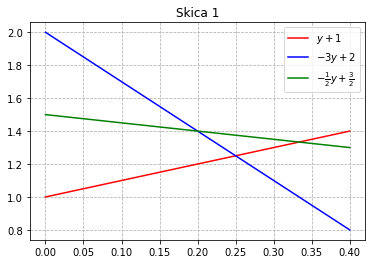

In [19]:
fig, ax = plt.subplots()
y = np.linspace(0, 0.4)
ax.set_title('Skica 1')
ax.plot(y, y + 1, label=r'$y+1$', color='red')
ax.plot(y, -3*y + 2, label=r'$-3y+2$', color='blue')
ax.plot(y, -0.5*y + 1.5, label=r'$-\frac{1}{2}y+\frac{3}{2}$', color='green')
ax.grid(linestyle='dashed', linewidth=0.75)
ax.legend(loc=0);

Isti graf možemo nacrtati i koristeći plot funckiju iz paketa sympy:

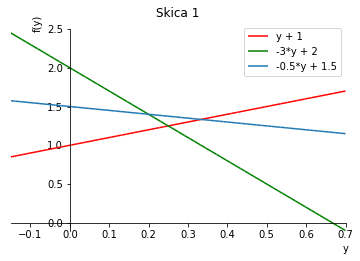

In [35]:
y = symbols('y')
p1 = plot(y+1, -3*y+2, -0.5*y+1.5, (y, -0.15, 0.7), title='Skica 2', legend=True, show=False)
p1[0].line_color='r'
p1[1].line_color='g'
p1.show()

Sada se i iz skice vidi da je $\frac{1}{3}$ rješenje gornjeg problema. Ostaje još dobiti $x$. Postupak je sasvim analogan pa iznosimo samo rješenje.

In [20]:
U0 = Matrix([[-1, 2], [1, 1.5]])
U0

Matrix([
[-1,   2],
[ 1, 1.5]])

In [21]:
x = rijesi_minmax(U0, 2)
print(x)

Matrix([[-2*x + 1, 0.5*x + 1.5]])
2
1
-0.200000000000000


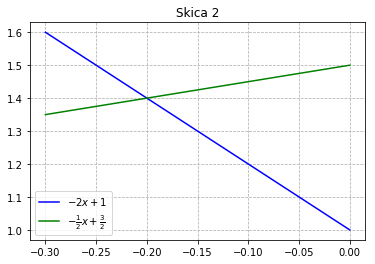

In [22]:
fig, ax = plt.subplots()
x = np.linspace(-0.3, 0)
ax.set_title('Skica 3')
ax.plot(x, -2*x + 1, label=r'$-2x+1$', color='blue')
ax.plot(x, 0.5*x + 1.5, label=r'$-\frac{1}{2}x+\frac{3}{2}$', color='green')
ax.grid(linestyle='dashed', linewidth=0.75)
ax.legend(loc=3);

Koristeći plot iz paketa sympy, to izgleda ovako:

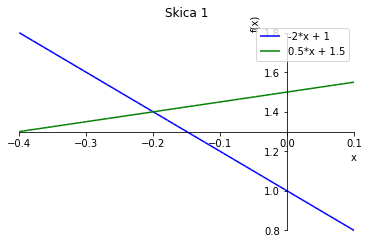

In [40]:
x = symbols('x')
p1 = plot(-2*x + 1, 0.5*x + 1.5, (x, -0.4, 0.1), title='Skica 4', legend=True, show=False)
p1[0].line_color='b'
p1[1].line_color='g'
p1.show()

Dakle, $x' = [-\frac{1}{5}\ \ \ -\frac{4}{5}], y'=[\frac{1}{3}\ \ \ \frac{2}{3}]$ i to je tražena NR, a vrijednost funkcije korisnosti u NR je $v=\frac{4}{3}$.  

Ovaj postupak se možda čini zahtjevnim, ali svakako je manje zahtjevan od iscrpnog pretraživanja po partitivnom skupu skupa $S_{A}×S_{B}$.

## 3. Igre u ekstenzivnoj formi

Sve igre u ekstenzivnoj formi možemo zapisati i u normalnoj (matričnoj) formi. Igre u ekstenzivnoj formi mogu biti igre s potpunim i nepotpunim informacijama. U ovom poglavlju ćemo se zadržati na igrama s potpunim informacijama. Zanimljiva stvar kod igara u ekstenzivnoj formi je to da uvijek ima Nashovu Ravnotežu, čak i ako promatramo samo čiste strategije.

Promotrimo nekoliko primjera igara u ekstenzivnoj formi.

Pretpostavimo da imamo 2 kompanije, $F_{1}$ i $F_{2}$. $F_{1}$ je monopolist na tržištu. $F_{2}$ može odabrati izaći na tržište ili ne (out / in). Ukoliko odluči izaći na tržište, $F_{1}$ može postupiti agresivno ili se prilagoditi (fight / accomodate).

True


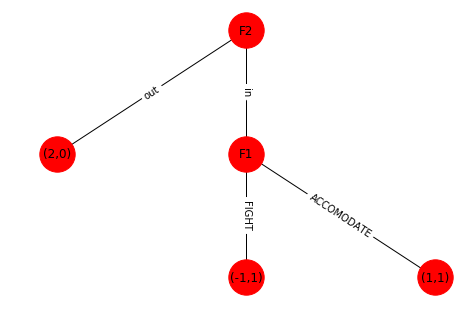

In [23]:
G2 =  nx.Graph()
G2.add_node('F2')
G2.add_node('F1')
G2.add_node('(2,0)')
G2.add_node('(-1,1)')
G2.add_node('(1,1)')

G2.add_edge('F2', '(2,0)')
G2.add_edge('F2', 'F1')
G2.add_edge('F1', '(-1,1)')
G2.add_edge('F1', '(1,1)')

pos2 = {'F2' : np.array([2,5]), '(2,0)' : np.array([1,4]), 
        'F1' : np.array([2,4]), '(-1,1)' : np.array([2,3]), '(1,1)' : np.array([3,3])}

edge_labels2 = {('F2', '(2,0)') : 'out', ('F2', 'F1') : 'in', ('F1', '(-1,1)') : 'FIGHT', ('F1', '(1,1)') : 'ACCOMODATE'}

nx.draw(G2,
        pos2,
        with_labels=True,
        node_size=1250,
        node_color='red')
nx.draw_networkx_edge_labels(G2, pos2, edge_labels = edge_labels2);

print(nx.is_tree(G2))

Igru rješavamo postupkom koji zovemo "indukcija unazad". Krećemo od listova stabla i gledamo koji se igraču više isplati odigrati.  
$F_{1}$ gubi $1$ ako odabere *fight*, a dobiva $1$ ako odabere *accomodate*, dakle bira *accomodate*.  
Tada čvoru $F_{1}$ dodjeljujemo isplatu $(1,1)$.  
Sada $F_{2}$ bira hoće li se probiti na tržište ili ne. Vidimo da *in* daje isplatu $1$, a *out* daje $0$, dakle bira *in*. Zaključujemo da je Nashova Ravnoteža (*in*, *accomodate*), s isplatom $(1,1)$.

Na prvi pogled se indukcija unazad čini kontraintuitivnom. Ako igrači igraju istovremeno, kako znaju što im se više isplati? Ako ne, zašto ne surađuju da bi došli do većih isplata?  
Radi se o sljedećem: indukcijom unazad samo unosimo vrijednosti na "prazne" čvorove stabla, a tek onda gledamo kako se odvija igra počevši s korijenom stabla.  

Objasnimo to na primjeru.

True


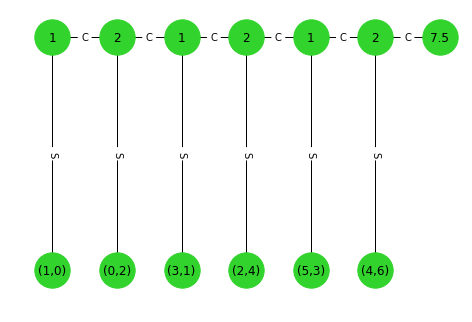

In [26]:
stonoga =  nx.Graph()
stonoga.add_node('1')
stonoga.add_node('2')
stonoga.add_node('3')
stonoga.add_node('4')
stonoga.add_node('5')
stonoga.add_node('6')
stonoga.add_node('7.5')
stonoga.add_node('(1,0)')
stonoga.add_node('(0,2)')
stonoga.add_node('(3,1)')
stonoga.add_node('(2,4)')
stonoga.add_node('(5,3)')
stonoga.add_node('(4,6)')

stonoga.add_edge('1', '2')
stonoga.add_edge('2', '3')
stonoga.add_edge('3', '4')
stonoga.add_edge('4', '5')
stonoga.add_edge('5', '6')
stonoga.add_edge('6', '7.5')
stonoga.add_edge('1', '(1,0)')
stonoga.add_edge('2', '(0,2)')
stonoga.add_edge('3', '(3,1)')
stonoga.add_edge('4', '(2,4)')
stonoga.add_edge('5', '(5,3)')
stonoga.add_edge('6', '(4,6)')

pos3 = {'1' : np.array([1,4]), '2' : np.array([2,4]), '3' : np.array([3,4]), '4' : np.array([4,4]),
        '5' : np.array([5,4]), '6' : np.array([6,4]), '7.5' : np.array([7,4]), '(1,0)' : np.array([1,3]), 
        '(0,2)' : np.array([2,3]), '(3,1)' : np.array([3,3]), '(2,4)' : np.array([4,3]), '(5,3)' : np.array([5,3]), 
        '(4,6)' : np.array([6,3])}

edge_labels3 = {('1', '2') : 'C', ('2', '3') : 'C', ('3', '4') : 'C', ('4', '5') : 'C', 
                ('5', '6') : 'C', ('6', '7.5') : 'C', ('1', '(1,0)'): 'S',
               ('2', '(0,2)') : 'S', ('3', '(3,1)') : 'S', ('4', '(2,4)') : 'S', 
               ('5', '(5,3)') : 'S', ('6', '(4,6)'):'S'}

node_labels3 = {'1': '1', '2' : '2', '3' : '1', '4' : '2', '5' : '1', '6' : '2', '7.5' : '7.5',
               '(1,0)' : '(1,0)', '(0,2)' : '(0,2)', '(3,1)' : '(3,1)', 
               '(2,4)' : '(2,4)', '(5,3)':'(5,3)', '(4,6)':'(4,6)' }

nx.draw(stonoga, 
        pos3, 
        with_labels=True,
        labels=node_labels3,
        node_size=1250,
        node_color='#32d32d')
nx.draw_networkx_edge_labels(stonoga, pos3, edge_labels=edge_labels3)

print(nx.is_tree(stonoga))

Opet rješavamo igru indukcijom unazad. U ovoj igri naizmjenično ispitujemo igrače žele li zaustaviti igru (S) i prihvatiti (donju) isplatu ili nastaviti igru (C) i dobiti desnu isplatu. Pogledajmo što se događa.  

Igrač $2$ bira između $(7,5)$ i $(4,6)$, bira S, jer mu više vrijedi $6$ nego $5$. Prepišemo $(4,6)$ u njegov čvor.  
Nakon njega, igrač $1$ bira između $(5,3)$ i $(4,6)$, bira S, jer mu više vrijedi $5$ nego $4$. Prepišemo $(5,3)$ u njegov čvor.  

Analogno "izvrtimo" igru do kraja, gdje igrač $1$ bira između $(1,0)$ i $(0,2)$ te bira $(1,0)$, što je konačna isplata i Nashova ravnoteža ove igre.  
Ovakvo ponašanje opet nije neočekivano zbog lokalne pohlepnosti Nashove ravnoteže.

Promotrimo još jedan primjer.

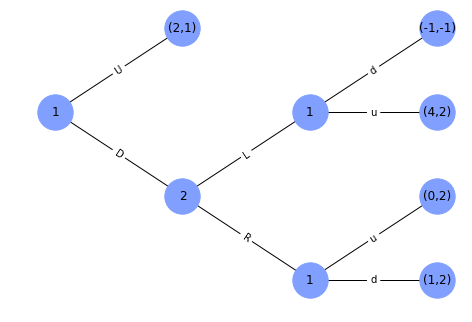

True


In [25]:
G = nx.Graph()
G.add_node('1')
G.add_node('2')
G.add_node('c')
G.add_node('d')

G.add_edge('1', '(2,1)')
G.add_edge('1', '2')
G.add_edge('2', 'c')
G.add_edge('c', '(4,2)')
G.add_edge('c', '(-1,-1)')
G.add_edge('2', 'd')
G.add_edge('d', '(0,2)')
G.add_edge('d', '(1,2)')

'''
pos = {'1' : np.array([0,1]), '(2,1)' : np.array([1,1]), 
       '2' : np.array([1,2]),
       'c' : np.array([2,3]), '(4,2)' : np.array([2,2]), '(-1,-1)' : np.array([3,3]),
       'd' : np.array([1,3]), '(0,2)' : np.array([1,4]), '(1,2)' : np.array([2,4])}
'''
pos = {'1' : np.array([0,3]), '(2,1)' : np.array([1,4]), 
       '2' : np.array([1,2]),
       'c' : np.array([2,3]), '(4,2)' : np.array([3,3]), '(-1,-1)' : np.array([3,4]),
       'd' : np.array([2,1]), '(0,2)' : np.array([3,2]), '(1,2)' : np.array([3,1])}

nx.draw(G, 
        pos, 
        with_labels=True, 
        labels = {'1': '1', '2' : '2', 'c' : '1', 'd' : '1', '(2,1)' : '(2,1)', '(4,2)' : '(4,2)', '(-1,-1)' : '(-1,-1)', '(0,2)' : '(0,2)', '(1,2)':'(1,2)' }, 
        node_size = 1250, 
        node_color='#809fff')

edge_labels = {('1', '(2,1)') : 'U', ('1', '2') : 'D',
               ('2', 'c') : 'L', ('2', 'd') : 'R',
               ('c', '(4,2)') : 'u', ('c', '(-1,-1)') : 'd',
               ('d', '(0,2)') : 'u', ('d', '(1,2)') : 'd'}

edges = nx.draw_networkx_edge_labels(G,
                            pos,
                            edge_labels = edge_labels)

plt.show()
print(nx.is_tree(G))

U ovoj igri prvi igrač prvo "istovremeno" bira između $(4,2)$ i $(-1,-1)$ i između $(0,2)$ i $(1,2)$.  
Nakon što odabere, drugi igrač bira između $(4,2)$ i $(1,2)$, ali njemu je svejedno jer ima isplatu $2$ što god da odabere.  
Ako odabere $(4,2)$, kad prvi igrač opet dođe na red, bira $(4,2)$, a ako odabere $(1,2)$, prvi igrač nakon njega bira $(2,1)$. Dakle, zbog indiferentnosti igrača $2$, imamo više Nashovih ravnoteža: (Du, L) i (Ud, R), s isplatama $(4,2)$ i $(2,1)$, respektivno.